Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


总运行时间：0.014秒


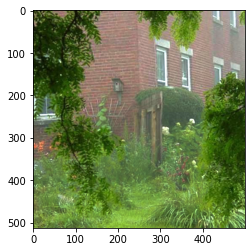

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

def cv_imshow(img):
    cv.imshow('result',img)
    cv.waitKey(0)  # 按任意键继续执行，可以自定义设置时间，单位毫秒
    cv.destroyAllWindows()

def AirlightEstimate(img):
    im = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    imlist = [[],[]]
    for times in range(5):
        h,w = im.shape[0],im.shape[1]
        imlist[0].append(im[0:int(h/2),0:int(w/2)])
        imlist[0].append(im[0:int(h/2),int(w/2):w])
        imlist[0].append(im[int(h/2):h,0:int(h/2)])
        imlist[0].append(im[int(h/2):h,int(w/2):w])
        imlist[1].append(img[0:int(h/2),0:int(w/2)])
        imlist[1].append(img[0:int(h/2),int(w/2):w])
        imlist[1].append(img[int(h/2):h,0:int(h/2)])
        imlist[1].append(img[int(h/2):h,int(w/2):w])
        scorelist = [np.mean(i) for i in imlist[0]]
        max_index = np.argmax(scorelist)
        im,img = imlist[0][max_index],imlist[1][max_index]
        imlist = [[],[]]
    img_single_channel_list = cv.split(img)
    for channel in img_single_channel_list:
        A.append(np.mean(channel))

imglist = ['1.jpeg','2.jpeg','3.jpeg','4.jpg','5.png','6.png']
path = '..\\haze_image\\'+imglist[0]
A= []
I = cv.imread(path)
height,width = I.shape[0],I.shape[1]
# ---------------------
##gray = cv.cvtColor(I,cv.COLOR_BGR2GRAY) #
start = time.time()
hsv = cv.cvtColor(I,cv.COLOR_BGR2HSV) # 创建HSV图
h,chroma,value = cv.split(hsv)
dP = 0.121779+0.959710*value-0.780245*chroma

##gray = gray / 255
dP = dP / 255
##d_ref = Guidedfilter(gray,dP,48,0.0001)
d_ref = np.exp(-dP)
d_ref = np.clip(d_ref,0.1,1)
end = time.time()
##for w in range(width):
##   for h in range(height):
##       d_ref[h,w] = 0.1 if d_ref[h,w] < 0.1 else d_ref[h,w]
##       d_ref[h,w] = 1 if d_ref[h,w] > 1 else d_ref[h,w]
# ----------------------
AirlightEstimate(I)
I_single_channel_list = cv.split(I)
result = [(I_single_channel_list[i] - A[i]) / d_ref + A[i] for i in range(3)]
print("总运行时间：%.3f秒" % (end-start))
dst = cv.merge((result[2],result[1],result[0]))
dst /= 255
plt.imshow(dst)
plt.show()
##cv_imshow(dst/255)
##cv.imwrite('result\\result_'+path,dst)

In [6]:
np.where(dst > 1)

(array([  0,   0,   0, ..., 505, 506, 511], dtype=int64),
 array([435, 435, 436, ..., 411, 499, 489], dtype=int64),
 array([1, 2, 1, ..., 1, 1, 1], dtype=int64))